Compiling team shooting stats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

april=pd.read_csv(r"C:\Users\Bryant Xia\Desktop\lead_change_analysis\april_shooting_stats.csv")
may=pd.read_csv(r"C:\Users\Bryant Xia\Desktop\lead_change_analysis\may_shooting_stats.csv")

april.head()

,game_id,team,2pt_makes,2pt_attempts,3pt_makes,3pt_attempts
0,20220416_UTA_DAL,UTA,29,61,7,22
1,20220416_UTA_DAL,DAL,20,44,9,32
2,20220416_MIN_MEM,MIN,29,49,16,41
3,20220416_MIN_MEM,MEM,32,59,7,27
4,20220416_TOR_PHI,TOR,28,52,12,30


In [7]:
merged=pd.concat([april, may], axis=0)

merged.head()

,game_id,team,2pt_makes,2pt_attempts,3pt_makes,3pt_attempts
0,20220416_UTA_DAL,UTA,29,61,7,22
1,20220416_UTA_DAL,DAL,20,44,9,32
2,20220416_MIN_MEM,MIN,29,49,16,41
3,20220416_MIN_MEM,MEM,32,59,7,27
4,20220416_TOR_PHI,TOR,28,52,12,30


In [19]:
merged['game_count']=1
tm=merged.groupby(['team']).sum()
tm.head(5)

,2pt_makes,2pt_attempts,3pt_makes,3pt_attempts,game_count
team,,,,,
ATL,230,432,114,350,10
BOS,540,999,291,806,22
BRK,222,406,92,218,8
CHI,260,534,104,368,10
DAL,491,941,377,998,24


In [20]:
tm['2pt_pct']=tm['2pt_makes']/tm['2pt_attempts']
tm['3pt_pct']=tm['3pt_makes']/tm['3pt_attempts']
tm['shots_per_game']=(tm['2pt_attempts']+tm['3pt_attempts'])/tm['game_count']

tm.head()

,2pt_makes,2pt_attempts,3pt_makes,3pt_attempts,game_count,2pt_pct,3pt_pct,shots_per_game
team,,,,,,,,
ATL,230,432,114,350,10,0.532407,0.325714,78.200000
BOS,540,999,291,806,22,0.540541,0.361042,82.045455
BRK,222,406,92,218,8,0.546798,0.422018,78.000000
CHI,260,534,104,368,10,0.486891,0.282609,90.200000
DAL,491,941,377,998,24,0.521785,0.377756,80.791667


In [23]:
tm.index

Index(['ATL', 'BOS', 'BRK', 'CHI', 'DAL', 'DEN', 'GSW', 'MEM', 'MIA', 'MIL',
       'MIN', 'NOP', 'PHI', 'PHO', 'TOR', 'UTA'],
      dtype='object', name='team')

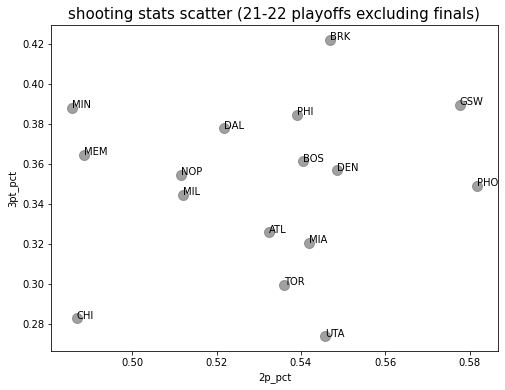

In [35]:
annotations=tm.index
X=tm['2pt_pct']
Y=tm['3pt_pct']
plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=100,color="grey", alpha=0.75)
plt.xlabel("2p_pct")
plt.ylabel("3pt_pct")
plt.title("shooting stats scatter (21-22 playoffs excluding finals)",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

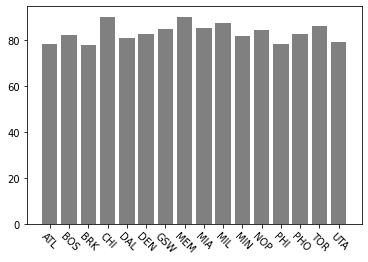

In [37]:
plt.bar(tm.index, tm['shots_per_game'], color="grey")
plt.xticks(rotation = 315)
plt.show()

In [134]:
import random 

def simulation (team1, team2):
    possessions=tm['shots_per_game'][team1]+tm['shots_per_game'][team2]
    p=tm['shots_per_game'][team1]/possessions
    team1_tally=[]
    team1_tally.append (0)
    team2_tally=[]
    team2_tally.append (0)
    poss_dummy=[]
    poss_dummy.append (0)
    for i in range (0, int(possessions)+1):
        poss_dummy.append(i+1)
        if (random.random()<=p): # team1's ball
            two_chance=tm['2pt_attempts'][team1]/(tm['2pt_attempts'][team1]+tm['3pt_attempts'][team1])
            if (random.random()<two_chance):
                if (random.random()<=tm['2pt_pct'][team1]):
                    team1_tally.append (team1_tally[-1]+2)
                    team2_tally.append (team2_tally[-1])
                else:
                    team1_tally.append (team1_tally[-1])
                    team2_tally.append (team2_tally[-1])
            else:
                if (random.random()<=tm['3pt_pct'][team1]):
                    team1_tally.append (team1_tally[-1]+3)
                    team2_tally.append (team2_tally[-1])
                else:
                    team1_tally.append (team1_tally[-1])
                    team2_tally.append (team2_tally[-1])
        else:
            two_chance=tm['2pt_attempts'][team2]/(tm['2pt_attempts'][team2]+tm['3pt_attempts'][team2])
            if (random.random()<two_chance):
                if (random.random()<tm['2pt_pct'][team2]):
                    team2_tally.append (team2_tally[-1]+2)
                    team1_tally.append (team1_tally[-1])
                else:
                    team1_tally.append (team1_tally[-1])
                    team2_tally.append (team2_tally[-1])
            else:
                if (random.random()<tm['3pt_pct'][team2]):
                    team2_tally.append (team2_tally[-1]+3)
                    team1_tally.append (team1_tally[-1])
                else:
                    team1_tally.append (team1_tally[-1])
                    team2_tally.append (team2_tally[-1])

    plt.title (team1+" vs. "+team2+" simulation")
    plt.xlabel("Possessions")
    plt.ylabel("Cumulative Points")
    plt.plot (poss_dummy, np.array(team1_tally), label=team1, color="green")
    plt.plot (poss_dummy, np.array(team2_tally), label=team2, color="blue")
    plt.legend()
    plt.grid(visible=True, color="grey")
    plt.show()


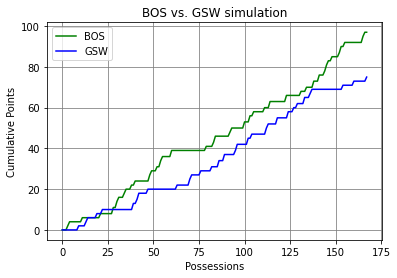

In [138]:
simulation ("BOS", "GSW")